Importation des modules nécessaires à l'algorithme

In [24]:
import tempfile
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import filters
import cv2
import time
import random

Pre-processing : Black Frame Removal

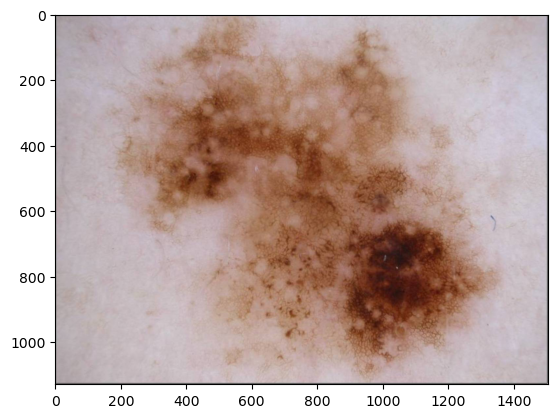

In [25]:
FilePath = "/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-201/Projet-git/ima201-skinlesions-billykaeppelin/skin_lesion_dataset-master/"
FileName = "melanoma/ISIC_0000049.jpg"
FileName2 = "melanoma/ISIC_0000145.jpg"
melanoma_database=["melanoma/ISIC_0000030.jpg","melanoma/ISIC_0000046.jpg","melanoma/ISIC_0000049.jpg","melanoma/ISIC_0000140.jpg","melanoma/ISIC_0000142.jpg","melanoma/ISIC_0000143.jpg",
                "melanoma/ISIC_0000145.jpg","melanoma/ISIC_0000146.jpg","melanoma/ISIC_0000150.jpg","melanoma/ISIC_0000151.jpg"]
nevus_database=["nevus/ISIC_0000000.jpg","nevus/ISIC_0000001.jpg","nevus/ISIC_0000008.jpg","nevus/ISIC_0000019.jpg","nevus/ISIC_0000024.jpg","nevus/ISIC_0000042.jpg","nevus/ISIC_0000045.jpg",
                "nevus/ISIC_0000080.jpg","nevus/ISIC_0000095.jpg","nevus/ISIC_0000112.jpg"]
im=io.imread(FilePath+FileName)
plt.imshow(im)

In [26]:
def remove_black_frame(im):
    # Calcul de la luminosité
    im_lightness = np.zeros((im.shape[0], im.shape[1]))
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            luminosity = (max(im[row][column]) + min(im[row][column])) // 2
            if luminosity < 60:
                im_lightness[row][column] = 0
            else:
                im_lightness[row][column] = 1
    print(im_lightness)
    print(im_lightness[0])
    print(im_lightness[:][0])
    # Suppression du cadre noir - Numérisation de haut en bas
    seuil = 0
    row = 0
    while row < im.shape[0] and seuil < 0.6:
        S = np.sum(im_lightness[row])
        seuil = S / im.shape[1]
        row += 1

    # Suppression du cadre noir - Numérisation de gauche à droite
    seuil = 0
    column = 0
    while column < im.shape[1] and seuil < 0.6:
        col_lightness=[]
        for i in range(im.shape[0]):
            col_lightness.append(im_lightness[i][column])
        S = np.sum(col_lightness)
        seuil = S / im.shape[1]
        column += 1
    
    # Suppression du cadre noir - Numérisation de droite à gauche
    seuil = 0
    column_reverse = im.shape[1] - 1
    while seuil < 0.6 and column_reverse > 0:
        col_lightness=[]
        for i in range(im.shape[0]):
            col_lightness.append(im_lightness[i][column_reverse])
        seuil = S / im.shape[1]
        column_reverse -= 1

    #Suppresion du cadre noir -Numérisation de bas en haut
    seuil = 0
    row_reverse = im.shape[0] - 1
    while seuil < 0.6 and row_reverse > 0:
        S = np.sum(im_lightness[row_reverse])
        seuil = S / im.shape[1]
        row_reverse -= 1
        
    print(row, column, column_reverse)

    if not (row < im.shape[0] and column < im.shape[1] and column_reverse > 0):
        return im
    # Suppression du cadre noir - Réduction de l'image
    im_cropped = im[row:, column:column_reverse]
    
    return im_cropped


(1536, 2048, 3)


/var/folders/zz/y6p01ncd2z9_ty6kfx1zk1mh0000gn/T/ipykernel_7736/2172428818.py:6: RuntimeWarning: overflow encountered in scalar add
  luminosity = (max(im[row][column]) + min(im[row][column])) // 2


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
1 2048 0
(1536, 2048, 3)


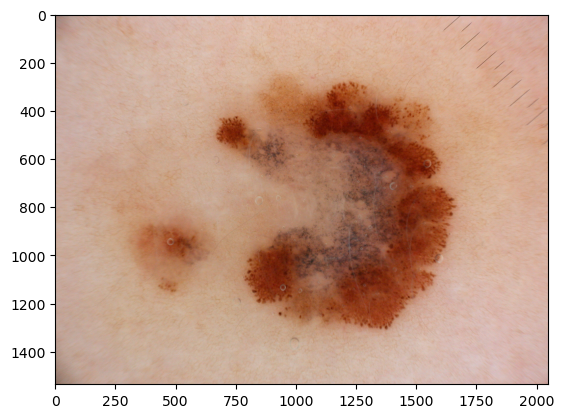

In [27]:
im=io.imread(FilePath+melanoma_database[8])
print(im.shape)
im_cropped=remove_black_frame(im)
plt.figure("2")
plt.imshow(im)
print(im_cropped.shape)

Image smoothing - Median filter

In [28]:
def median_filter(im):
    # Calcul de la taille du filtre
    M=im.shape[0]
    N=im.shape[1]
    kernel_size=int(np.floor(5*np.sqrt((M/768)*(N/512))))
    if kernel_size%2==0:
        kernel_size+=1
    print(kernel_size)
    image_filtree = cv2.medianBlur(im, kernel_size)
    return image_filtree


In [29]:
# Fonction de redimensionnement de l'image
def resize_image(im,size):
    # Afficher la taille de l'image
    print("taille image : ", im.shape)
    # Réduire la taille de l'image
    im_optimal_size = cv2.resize(im, (size[0],size[1]))
    # Afficher la taille de l'image réduite
    print("taille image réduite : ", im_optimal_size.shape)
    # Afficher l'image réduite et l'image originale
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(im)
    axs[0].set_title('Original Image')
    axs[1].imshow(im_optimal_size)
    axs[1].set_title('Reduced Image')
    plt.show()
    return im_optimal_size

In [30]:
#Fonction de pré-processing complet
def preprocessing(im, size):
    # Suppression du cadre noir
    im_cropped = remove_black_frame(im)
    # Redimensionnement
    image_optimal_size = resize_image(im_cropped, size)
    # Filtrage médian
    image_filtree = median_filter(image_optimal_size)
    
    return image_filtree

/var/folders/zz/y6p01ncd2z9_ty6kfx1zk1mh0000gn/T/ipykernel_7736/2172428818.py:6: RuntimeWarning: overflow encountered in scalar add
  luminosity = (max(im[row][column]) + min(im[row][column])) // 2


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
1 2048 0
taille image :  (1536, 2048, 3)
taille image réduite :  (150, 200, 3)


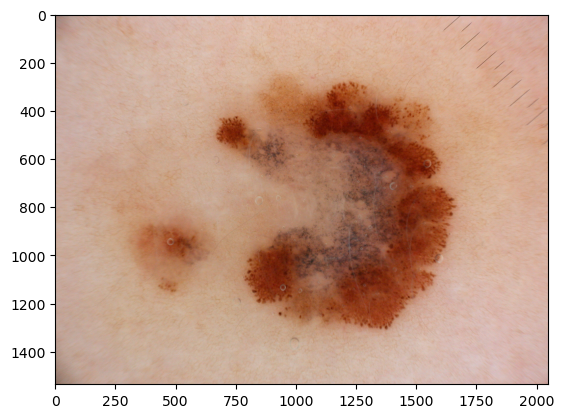

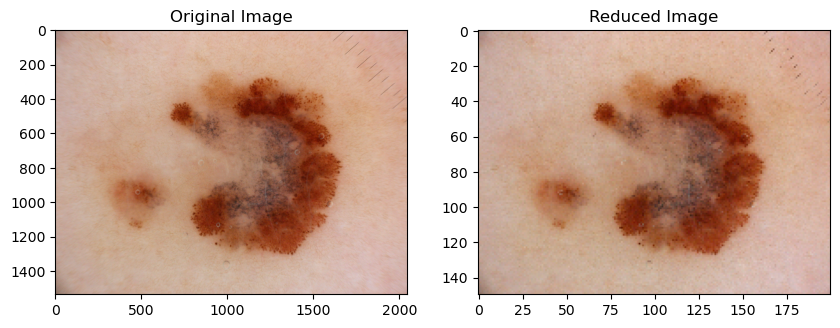

1


array([[[157, 131, 116],
        [156, 133, 119],
        [174, 133, 129],
        ...,
        [211, 162, 147],
        [205, 160, 149],
        [201, 159, 152]],

       [[155, 129, 113],
        [158, 135, 123],
        [169, 136, 124],
        ...,
        [205, 166, 151],
        [200, 155, 150],
        [196, 153, 148]],

       [[164, 131, 120],
        [167, 141, 136],
        [170, 144, 140],
        ...,
        [201, 152, 140],
        [197, 153, 142],
        [205, 164, 162]],

       ...,

       [[147, 123, 112],
        [149, 127, 114],
        [159, 126, 116],
        ...,
        [213, 178, 174],
        [202, 168, 160],
        [208, 176, 173]],

       [[143, 116, 105],
        [151, 123, 122],
        [153, 126, 104],
        ...,
        [204, 175, 165],
        [195, 165, 164],
        [198, 163, 166]],

       [[139, 111,  98],
        [144, 117, 103],
        [152, 122, 112],
        ...,
        [207, 168, 161],
        [199, 164, 157],
        [193, 155, 147]]

In [31]:
im=io.imread(FilePath+melanoma_database[8])
plt.imshow(im)
preprocessing(im,(200,150))

Implémentation de l'algorithme de SRM

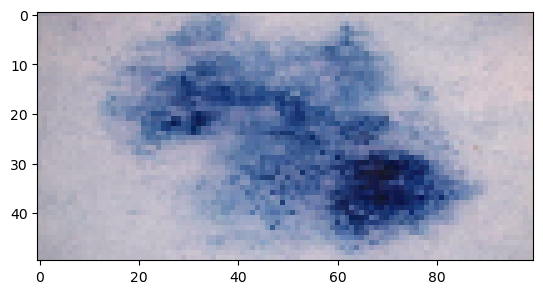

In [33]:
import cv2
import matplotlib.pyplot as plt

# Charger une image
image = cv2.imread(FilePath+FileName)

# Réduire la taille de l'image
im_reduced = cv2.resize(image, (100, 50))

# Afficher l'image réduite
plt.imshow(im_reduced)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


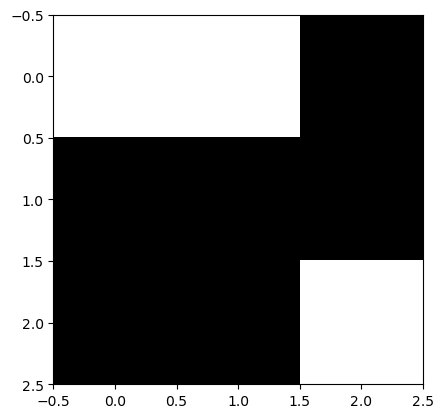

In [34]:
#Préparation d'une image trivial pour tester la focntion SRM_segmentation
im_trivial=np.zeros((3,3,3))
im_trivial[0][0]=[255,255,255]
im_trivial[0][1]=[255,255,255]
im_trivial[2][2]=[255,255,255]

plt.imshow(im_trivial)

In [35]:

class Pixel:
    def __init__(self, x, y, value):
        self.x = x
        self.y = y
        self.value = value

class Region:
    def __init__(self, pixel):
        self.pixels = [pixel]  # Liste des pixels de la région
        self.statistics = self.calculate_statistics()  # Propriétés statistiques de la région

    def calculate_statistics(self):
        # Calcule les statistiques de la région, par exemple la moyenne et l'écart type des valeurs de pixel
        #print(self.pixels[0].value)
        pixel_values = [pixel.value for pixel in self.pixels]
        mean = np.mean(pixel_values)
        std_dev = np.std(pixel_values)
        return {'mean': mean, 'std_dev': std_dev}

def calculate_similarity(region1, region2):
    # Calcule la similarité entre deux régions en comparant leurs statistiques, par exemple en utilisant la différence des moyennes
    mean_diff = abs(region1.statistics['mean'] - region2.statistics['mean'])
    return mean_diff




SRM_segmentation

In [36]:
def creer_image_regions(regions,regions_updated):
    image_regions=np.zeros((len(regions),len(regions[0]),3))
    for x in range(len(regions)):
        for y in range(len(regions[0])):
            image_regions[x][y]=[0,0,regions[regions_updated[x][y][0]][regions_updated[x][y][1]].statistics['mean'].astype(int)]
    return image_regions.astype(int)

In [37]:

def SRM_segmentation_detaillee(image, seuil_similarity, canal=2):
    # Initialisation : chaque pixel est une région
    rows, cols = image.shape[0],image.shape[1]
    print("rows : ", rows)
    print("cols : ", cols)            
    regions = [[Region(Pixel(x, y, image[x,y][canal])) for y in range(cols)] for x in range(rows)]
    regions_updated=[[(x,y)for y in range(cols)] for x in range(rows)]
    print("regions_updated : ", regions_updated)
    nb_regions_ini = len(regions)*len(regions[0])
    print("Nombre de régions au début: ", len(regions)*len(regions[0]))
    # Fusion des régions
    start_time = time.time()
    print("Entrée dans la boucle while")
    while True:
        n=0
        min_similarity = float('inf')
        regions_to_merge = None
        merge_occurred = False  # Variable pour suivre si une fusion a eu lieu dans cette itération
        # Recherche des paires de régions les plus similaires
        for x in range(rows):
            for y in range(cols):   
                if x < rows - 1 and regions_updated[x][y]!=regions_updated[x+1][y]:
                    x_region=regions_updated[x][y][0]
                    y_region=regions_updated[x][y][1]
                    x_xplus1y_region=regions_updated[x+1][y][0]
                    y_xplus1y_region=regions_updated[x+1][y][1]
                    print(x,y)
                    similarity = calculate_similarity(regions[x_region][y_region], regions[x_xplus1y_region][y_xplus1y_region])
                    print("similarity : ", similarity)
                    if similarity < min_similarity:
                        min_similarity = similarity
                        print("min_similarity : ", min_similarity)
                        regions_to_merge = ((x, y), (x + 1, y))
                        
                if y < cols - 1 and regions_updated[x][y]!=regions_updated[x][y+1]:
                    x_region=regions_updated[x][y][0]
                    y_region=regions_updated[x][y][1]
                    x_xyplus1_region=regions_updated[x][y+1][0]
                    y_xyplus1_region=regions_updated[x][y+1][1]
                    print(x,y)

                    similarity = calculate_similarity(regions[x_region][y_region], regions[x_xyplus1_region][y_xyplus1_region])
                    print("similarity : ", similarity)
                    if similarity < min_similarity:
                        min_similarity = similarity
                        regions_to_merge = ((x, y), (x, y + 1))
                    
        # Vérification si la fusion est nécessaire
        if min_similarity <= seuil_similarity:
            (x1, y1), (x2, y2) = regions_to_merge
            x1_region=regions_updated[x1][y1][0]
            y1_region=regions_updated[x1][y1][1]
            x2_region=regions_updated[x2][y2][0]
            y2_region=regions_updated[x2][y2][1]
            # Fusion des deux régions
            print("fusion des deux régions"+str(x1)+str(y1)+str(x2)+str(y2))
            merged_pixel_values = regions[x1_region][y1_region].pixels + regions[x2_region][y2_region].pixels
            # Create a new Region with the merged pixel values
            merged_region = Region(Pixel(x1_region, y1_region, merged_pixel_values[0].value))
            merged_region.pixels = merged_pixel_values
            # mise à jour de regions_updated
            print(regions[x1_region][y1_region].pixels)
            print(regions[x2_region][y2_region].pixels)
            for i in regions[x2_region][y2_region].pixels:
                regions_updated[i.x][i.y]=(x1_region,y1_region)

            #regions_updated[x1][y1]=(x1_region,y1_region)
            #regions_updated[x2][y2]=(x1_region,y1_region)
            # Suppression des anciennes régions
            regions[x1_region][y1_region] = merged_region
            regions[x2_region][y2_region] = None  # Marquer la région comme fusionnée
            regions[x1_region][y1_region].statistics = regions[x1_region][y1_region].calculate_statistics()  # Recalculer les statistiques de la région fusionnée
            print("regions[x1][y1].statistics : ", regions[x1_region][y1_region].statistics)
            merge_occurred = True
            print(regions)
            print(regions_updated)
            
        else:
            break  # Arrêt lorsque la similarité minimale dépasse le seuil
        if not merge_occurred:
            break  # Arrêt lorsque aucune fusion n'a eu lieu dans cette itération
        # Calcul du temps restant
        elapsed_time = time.time() - start_time
        remaining_regions = sum([1 for row in regions for region in row if region is not None])
        time_per_merge = elapsed_time / (rows * cols - remaining_regions)
        remaining_time = remaining_regions * time_per_merge
        print(f"Temps restant : {remaining_time:.2f} secondes")
        #Affichage d'une image intermediaire
        
        image_region=creer_image_regions(regions,regions_updated)
        plt.figure(n)
        n+=1
        plt.imshow(image_region)
        plt.show()

        
    
    #Calcul du nombre de régions restantes
    nb_regions_fin=0
    for i in regions:
        for j in i:
            if j is not None:
                nb_regions_fin+=1
    print("Nombre de régions restantes: ", nb_regions_fin)
                
    return regions




In [38]:

def SRM_segmentation_simple(image, seuil_similarity, canal=2,suivi_temps=False,suivi_image=False):
    # Initialisation : chaque pixel est une région
    rows, cols = image.shape[0],image.shape[1]          
    regions = [[Region(Pixel(x, y, image[x,y][canal])) for y in range(cols)] for x in range(rows)]
    regions_updated=[[(x,y)for y in range(cols)] for x in range(rows)]
    nb_regions_ini = len(regions)*len(regions[0])
    print("Nombre de régions au début: ", nb_regions_ini)
    # Fusion des régions
    n=0
    start_time = time.time()
    while True:
        k=0
        min_similarity = float('inf')
        regions_to_merge = None
        merge_occurred = False  # Variable pour suivre si une fusion a eu lieu dans cette itération
        # Recherche des paires de régions les plus similaires
        for x in range(rows):
            for y in range(cols):   
                if x < rows - 1 and regions_updated[x][y]!=regions_updated[x+1][y]:
                    x_region=regions_updated[x][y][0]
                    y_region=regions_updated[x][y][1]
                    x_xplus1y_region=regions_updated[x+1][y][0]
                    y_xplus1y_region=regions_updated[x+1][y][1]
                    similarity = calculate_similarity(regions[x_region][y_region], regions[x_xplus1y_region][y_xplus1y_region])
                    if similarity < min_similarity:
                        min_similarity = similarity
                        regions_to_merge = ((x, y), (x + 1, y))
                        
                if y < cols - 1 and regions_updated[x][y]!=regions_updated[x][y+1]:
                    x_region=regions_updated[x][y][0]
                    y_region=regions_updated[x][y][1]
                    x_xyplus1_region=regions_updated[x][y+1][0]
                    y_xyplus1_region=regions_updated[x][y+1][1]
                    similarity = calculate_similarity(regions[x_region][y_region], regions[x_xyplus1_region][y_xyplus1_region])
                    if similarity < min_similarity:
                        min_similarity = similarity
                        regions_to_merge = ((x, y), (x, y + 1))
                    
        # Vérification si la fusion est nécessaire
        if min_similarity <= seuil_similarity:
            (x1, y1), (x2, y2) = regions_to_merge
            x1_region=regions_updated[x1][y1][0]
            y1_region=regions_updated[x1][y1][1]
            x2_region=regions_updated[x2][y2][0]
            y2_region=regions_updated[x2][y2][1]
            # Fusion des deux régions
            merged_pixel_values = regions[x1_region][y1_region].pixels + regions[x2_region][y2_region].pixels
            # Create a new Region with the merged pixel values
            merged_region = Region(Pixel(x1_region, y1_region, merged_pixel_values[0].value))
            merged_region.pixels = merged_pixel_values
            # mise à jour de regions_updated
            for i in regions[x2_region][y2_region].pixels:
                regions_updated[i.x][i.y]=(x1_region,y1_region)
            # Suppression des anciennes régions
            regions[x1_region][y1_region] = merged_region
            regions[x2_region][y2_region] = None  # Marquer la région comme fusionnée
            regions[x1_region][y1_region].statistics = regions[x1_region][y1_region].calculate_statistics()  # Recalculer les statistiques de la région fusionnée
            merge_occurred = True
            
        else:
            break  # Arrêt lorsque la similarité minimale dépasse le seuil
        if not merge_occurred:
            break  # Arrêt lorsque aucune fusion n'a eu lieu dans cette itération
        # Calcul du temps restant
        n+=1
        if suivi_temps:
            if n%nb_regions_ini//20==0:
                elapsed_time = time.time() - start_time
                remaining_regions = sum([1 for row in regions for region in row if region is not None])
                time_per_merge = elapsed_time / (rows * cols - remaining_regions)
                remaining_time = remaining_regions * time_per_merge
                remaining_minutes = remaining_time // 60
                print(f"Temps restant : {remaining_minutes:.2f} minutes")
        if suivi_image:    
            if n%nb_regions_ini//3==0:
                #Affichage d'une image intermediaire
                image_region=creer_image_regions(regions,regions_updated)
                plt.figure(n)
                k+=1
                plt.imshow(image_region)
                plt.show()


    #Calcul du nombre de régions restantes
    nb_regions_fin=0
    for i in regions:
        for j in i:
            if j is not None:
                nb_regions_fin+=1
    print("Nombre de régions restantes: ", nb_regions_fin)
    return regions,regions_updated




In [39]:
regions = SRM_segmentation_simple(im_trivial,100)

Nombre de régions au début:  9
Nombre de régions restantes:  3


In [ ]:
regions = SRM_segmentation_detaillee(im_trivial,100)

Nombre de régions au début:  5000
Nombre de régions restantes:  2


Text(0.5, 1.0, 'image_region')

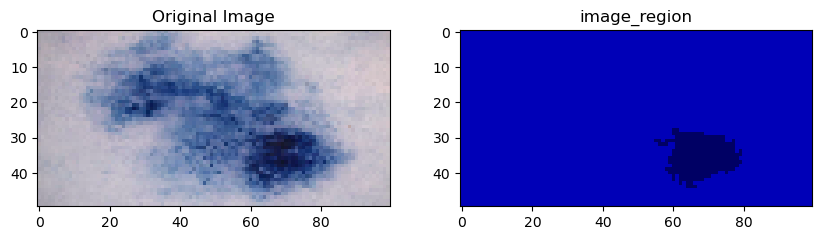

In [54]:
regions,regions_updated = SRM_segmentation_simple(im_reduced,80)
image_region=creer_image_regions(regions,regions_updated)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(im_reduced)
axs[0].set_title('Original Image')
axs[1].imshow(image_region)
axs[1].set_title('image_region')


In [40]:
from tqdm import tqdm

def optimisation_seuil_similarity(image,inf_seuil_similarity,sup_seuil_similarity,pas, canal=2):
    images_regions = []
    for seuil_similarity in tqdm(range(inf_seuil_similarity, sup_seuil_similarity, pas)):
        regions,regions_updated = SRM_segmentation_simple(image, seuil_similarity, canal)
        image_region = creer_image_regions(regions,regions_updated)
        images_regions.append(image_region)

    # Afficher les images des régions sur un même graphique
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, image_region in enumerate(images_regions):
        axs[i].imshow(image_region)
        axs[i].set_title(f"Seuil de similarité : {i*10}")
        axs[i].axis('off')
    
    plt.show()


In [ ]:
optimisation_seuil_similarity(im_reduced,0,100,10)
plt.imshow(im_reduced)

In [ ]:
regions,regions_updated = SRM_segmentation_simple(im_cropped,10)
image_region=creer_image_regions(regions,regions_updated)
plt.imshow(image_region)
plt.imshow(im_reduced)

La cellule précedente s'éxecute en 2000000 de secondes soit environ 23 jours. Il y a en effet 1 693 128 régions à merger.

Fonction de ségmentation d'une image avec Pré-processing et SRM_segmentation

In [ ]:
im = io.imread(FilePath+FileName)
image_preprocessed = preprocessing(im, (150, 100))
regions,regions_updated = SRM_segmentation_simple(image_preprocessed,50)
image_region = creer_image_regions(regions,regions_updated)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_preprocessed)
axs[0].set_title('Original Image')
axs[1].imshow(image_region)
axs[1].set_title('image_region')

In [ ]:
im = io.imread(FilePath+FileName2)
image_preprocessed = preprocessing(im, (150, 100))
regions,regions_updated = SRM_segmentation_simple(image_preprocessed,50)
image_region = creer_image_regions(regions,regions_updated)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_preprocessed)
axs[0].set_title('Original Image')
axs[1].imshow(image_region)
axs[1].set_title('image_region')


In [43]:
def test_database(database,FilePath):
    for FileName in database:
        im = io.imread(FilePath+FileName)
        image_preprocessed = preprocessing(im, (150, 100))
        regions,regions_updated = SRM_segmentation_simple(image_preprocessed,50)
        image_region = creer_image_regions(regions,regions_updated)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(image_preprocessed)
        axs[0].set_title('Original Image')
        axs[1].imshow(image_region)
        axs[1].set_title('image_region')
        plt.show()

/var/folders/zz/y6p01ncd2z9_ty6kfx1zk1mh0000gn/T/ipykernel_7736/2172428818.py:6: RuntimeWarning: overflow encountered in scalar add
  luminosity = (max(im[row][column]) + min(im[row][column])) // 2


[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 1501
taille image :  (1128, 1500, 3)
taille image réduite :  (100, 150, 3)


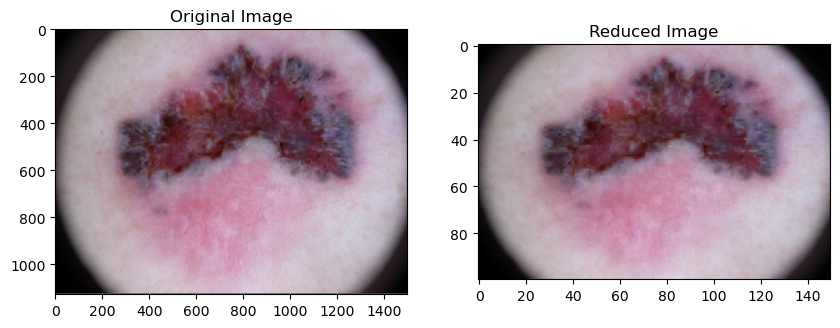

1
Nombre de régions au début:  15000
Nombre de régions restantes:  8


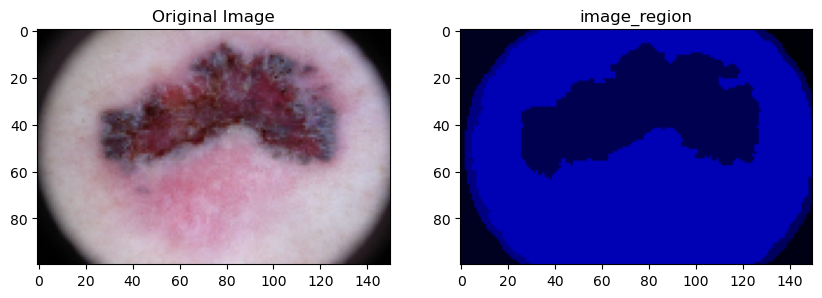

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 1502
taille image :  (1128, 1501, 3)
taille image réduite :  (100, 150, 3)


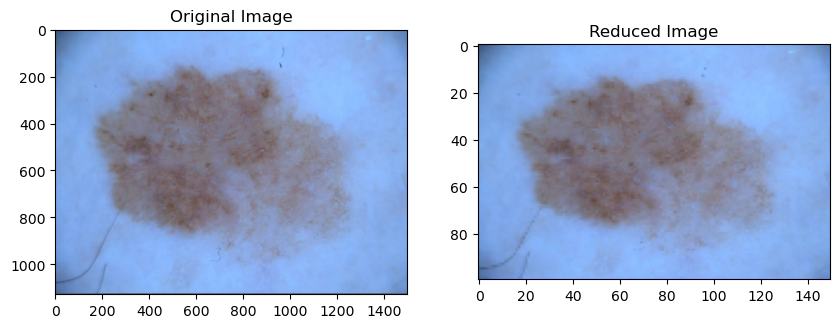

1
Nombre de régions au début:  15000
Nombre de régions restantes:  11


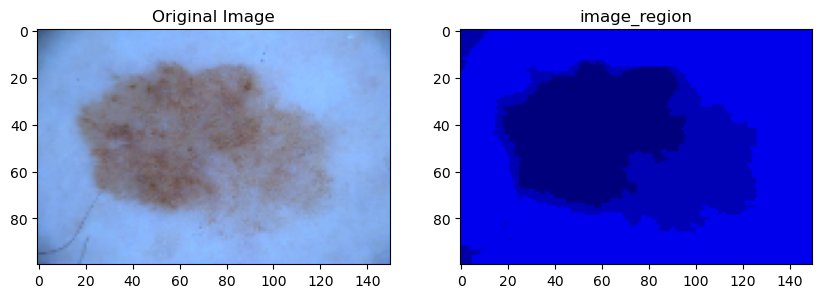

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 1502
taille image :  (1128, 1501, 3)
taille image réduite :  (100, 150, 3)


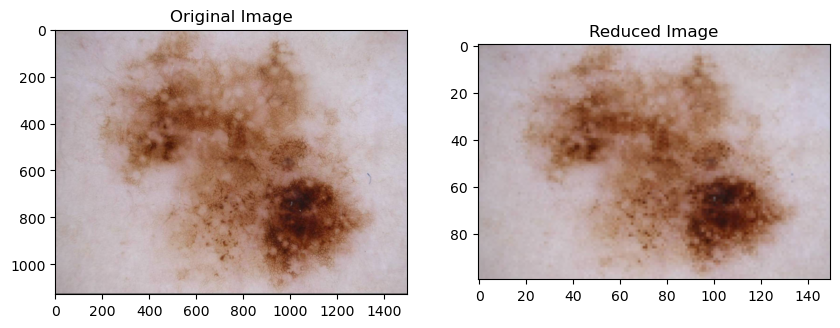

1
Nombre de régions au début:  15000
Nombre de régions restantes:  12


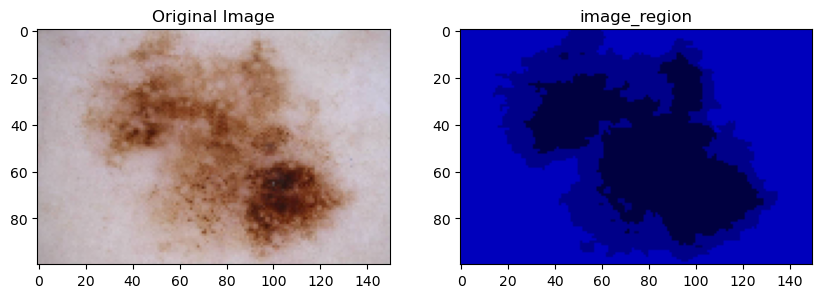

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
201 505 2814
taille image :  (1911, 2309, 3)
taille image réduite :  (100, 150, 3)


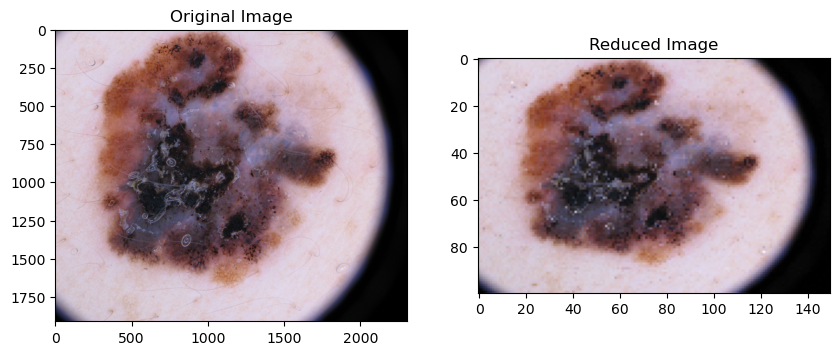

1
Nombre de régions au début:  15000
Nombre de régions restantes:  83


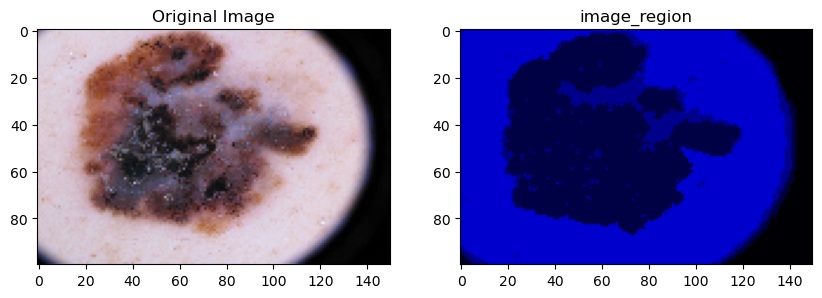

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 2046
taille image :  (1535, 2045, 3)
taille image réduite :  (100, 150, 3)


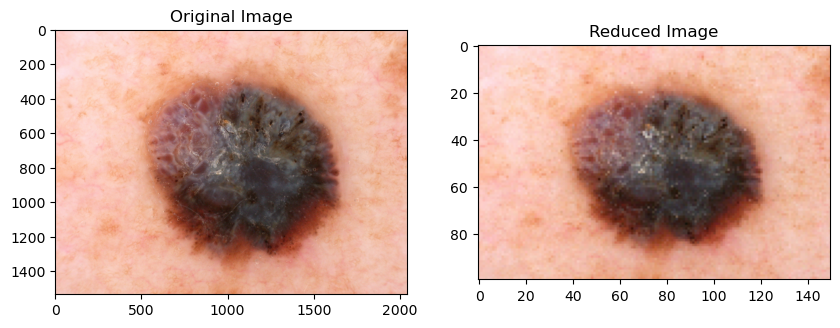

1
Nombre de régions au début:  15000
Nombre de régions restantes:  26


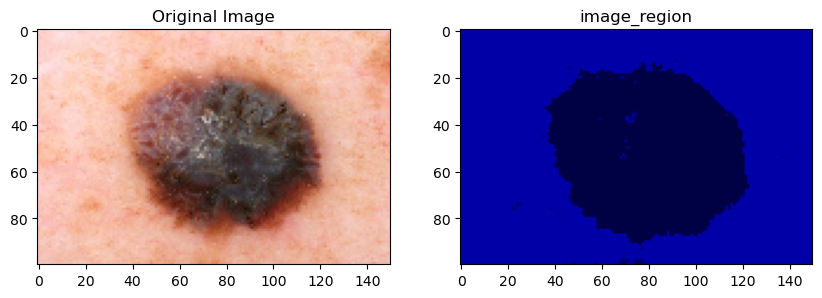

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]
1944 2592 0
taille image :  (1944, 2592, 3)
taille image réduite :  (100, 150, 3)


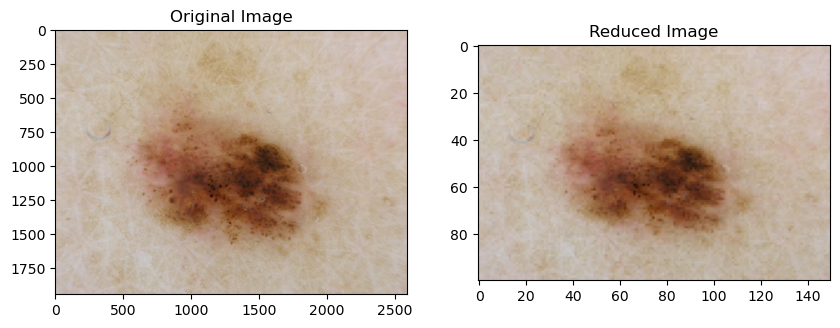

1
Nombre de régions au début:  15000
Nombre de régions restantes:  15


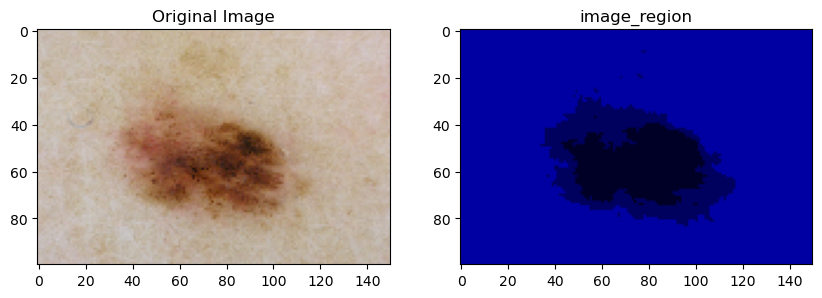

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 2046
taille image :  (1535, 2045, 3)
taille image réduite :  (100, 150, 3)


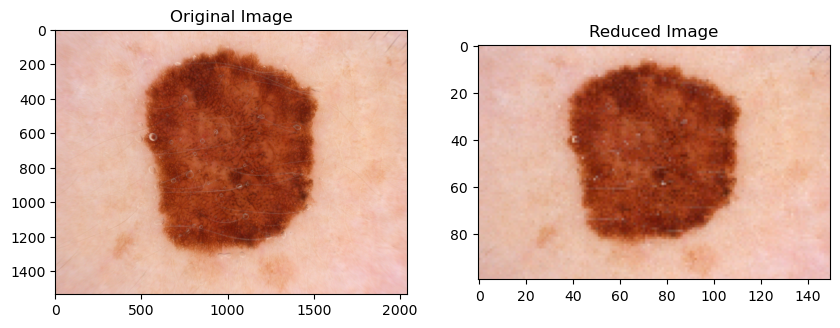

1
Nombre de régions au début:  15000
Nombre de régions restantes:  43


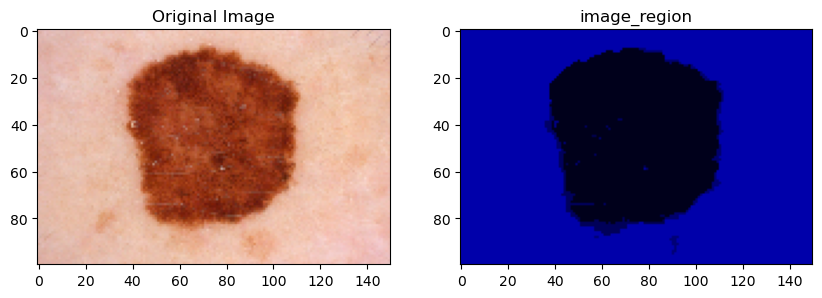

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
1 133 2046
taille image :  (1535, 1913, 3)
taille image réduite :  (100, 150, 3)


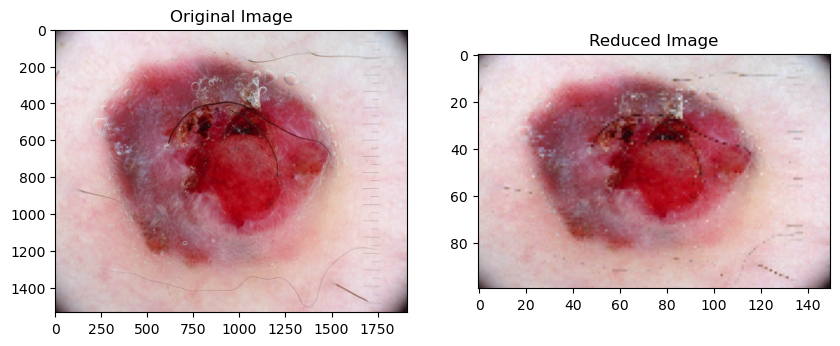

1
Nombre de régions au début:  15000
Nombre de régions restantes:  86


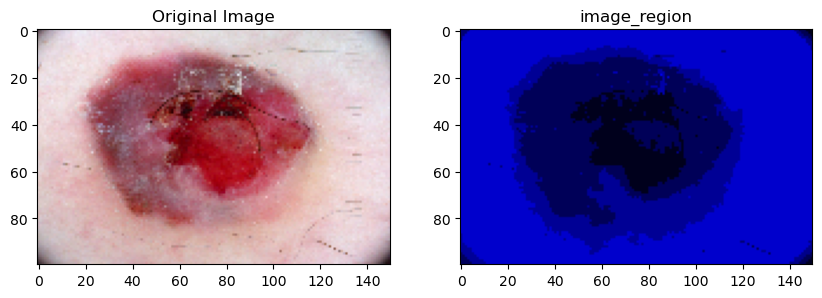

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
1 2048 0
taille image :  (1536, 2048, 3)
taille image réduite :  (100, 150, 3)


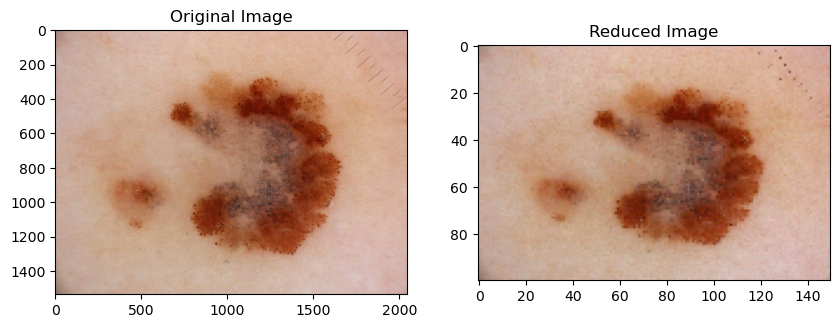

1
Nombre de régions au début:  15000
Nombre de régions restantes:  10


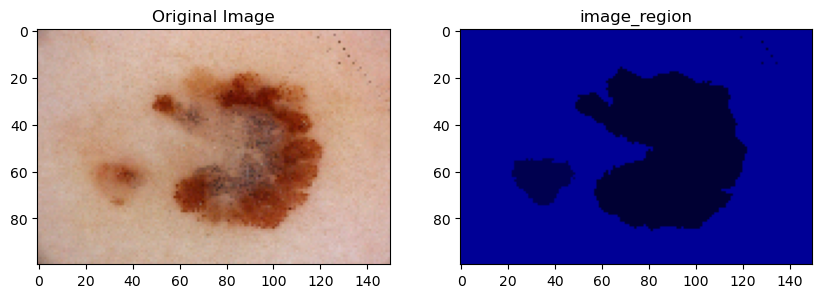

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
1536 2048 0
taille image :  (1536, 2048, 3)
taille image réduite :  (100, 150, 3)


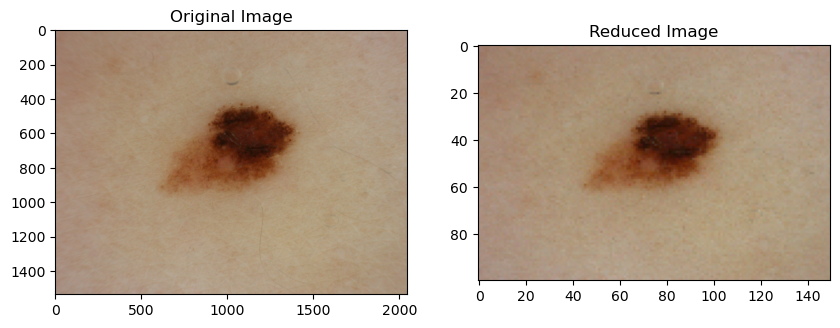

1
Nombre de régions au début:  15000
Nombre de régions restantes:  2


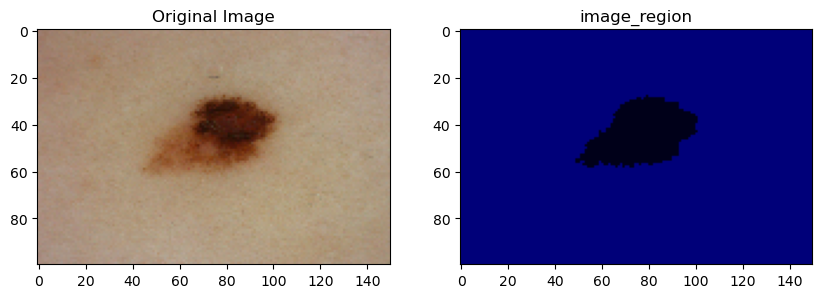

In [44]:
test_database(melanoma_database,FilePath)

/var/folders/zz/y6p01ncd2z9_ty6kfx1zk1mh0000gn/T/ipykernel_7736/2172428818.py:6: RuntimeWarning: overflow encountered in scalar add
  luminosity = (max(im[row][column]) + min(im[row][column])) // 2


[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
1 1 1020
taille image :  (766, 1019, 3)
taille image réduite :  (100, 150, 3)


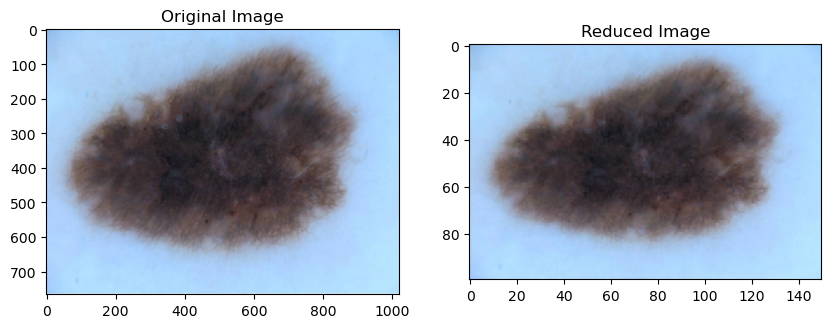

1
Nombre de régions au début:  15000


In [45]:
test_database(nevus_database,FilePath)

In [ ]:
im = io.imread(FilePath+FileName)
image_preprocessed = preprocessing(im, (350, 250))
regions,regions_updated = SRM_segmentation_simple(image_preprocessed,50)
image_region = creer_image_regions(regions,regions_updated)
plt.imshow(image_region)
plt.imshow(image_preprocessed)
